In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
sns.set_theme()
sns.set_context("poster", font_scale=1.4)

%matplotlib inline

This cell will get our MCMC algorithm.

In [12]:
%%capture
%run ../mcmc.py

In [13]:
data_filepath = './../../archive/processed_data.csv'

In [30]:
df = pd.read_csv(data_filepath, index_col=0)

In [31]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer,years_old,manufacturer_encoded,transmission_encoded,fuel_encoded,seller_type_encoded,owner_encoded
0,60000,0.086783,Petrol,Individual,Manual,First Owner,Maruti,14,18,1,4,1,2
1,135000,0.061988,Petrol,Individual,Manual,First Owner,Maruti,14,18,1,4,1,2
2,600000,0.123976,Diesel,Individual,Manual,First Owner,Hyundai,9,10,1,1,1,2
3,250000,0.057028,Petrol,Individual,Manual,First Owner,Datsun,4,5,1,4,1,2
4,450000,0.174807,Diesel,Individual,Manual,Second Owner,Honda,7,9,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,0.099181,Diesel,Individual,Manual,Second Owner,Hyundai,7,10,1,1,1,3
4336,409999,0.099181,Diesel,Individual,Manual,Second Owner,Hyundai,7,10,1,1,1,3
4337,110000,0.102900,Petrol,Individual,Manual,Second Owner,Maruti,12,18,1,4,1,3
4338,865000,0.111579,Diesel,Individual,Manual,First Owner,Hyundai,5,10,1,1,1,2


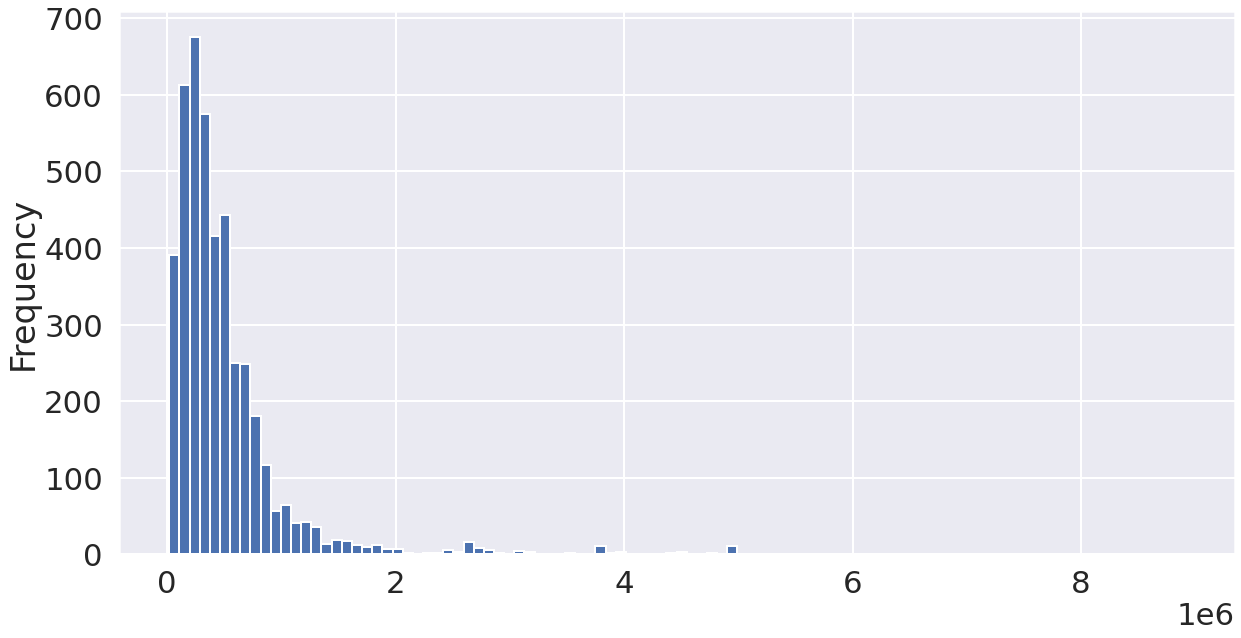

In [49]:
ax1 = df['selling_price'].plot.hist(
    bins=100,
    figsize=(20, 10)     
)

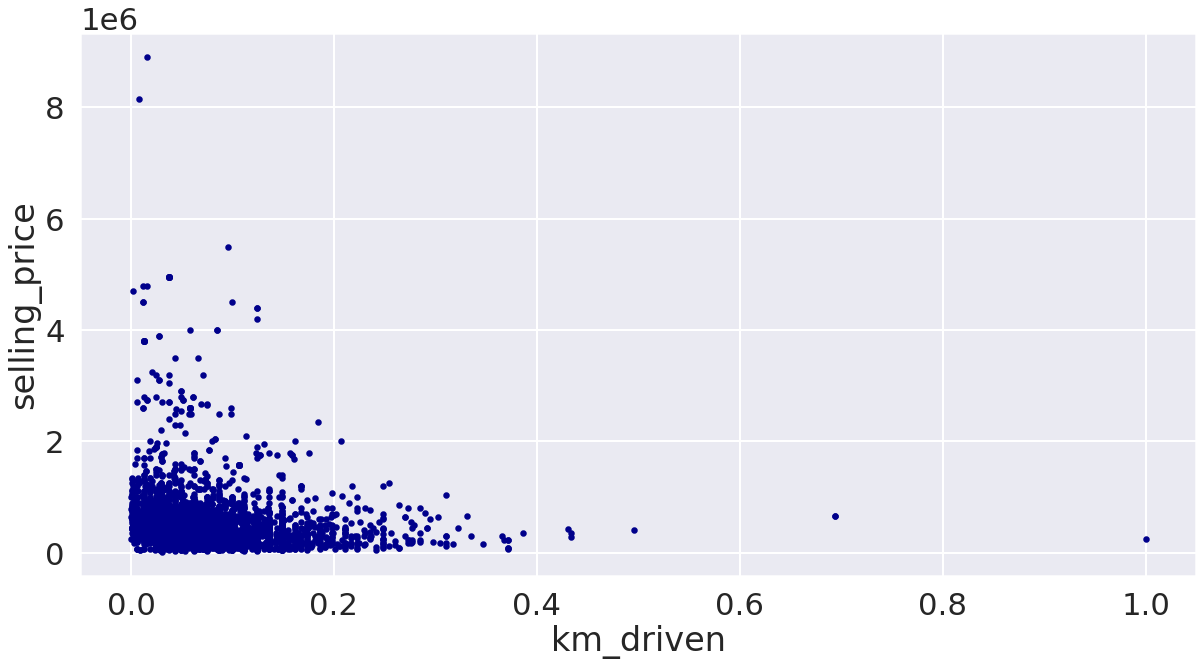

In [38]:
ax1 = df.plot.scatter(
    x='km_driven',
    y='selling_price',
    c='DarkBlue',
    figsize=(20, 10)     
)

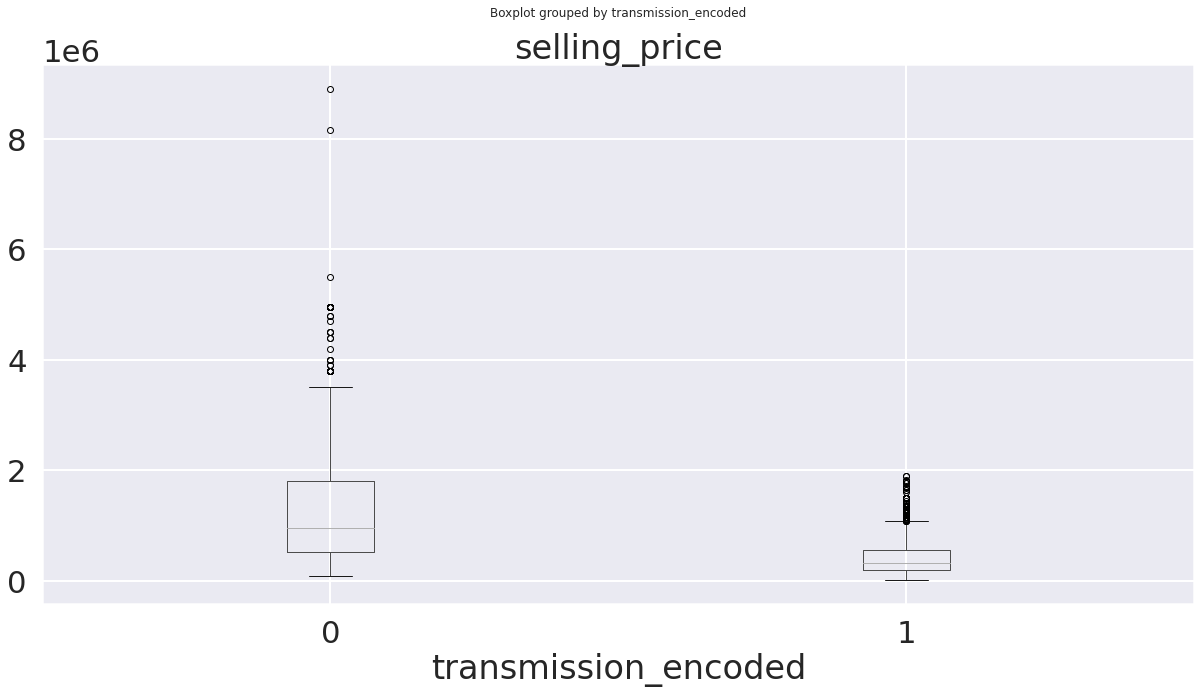

In [43]:
ax1 = df.boxplot(
    column='selling_price',
    by='transmission_encoded',
    figsize=(20, 10)     
)

In [25]:
len(df['fuel_encoded'].unique())

5

In [24]:
len(df['owner_encoded'].unique())

5

In [23]:
len(df['manufacturer_encoded'].unique())

29

In [26]:
len(df['seller_type_encoded'].unique())

3

In [27]:
len(df['transmission_encoded'].unique())

2

In [ ]:
def proposal(X, Beta):
    """
    X = [km_driven, years_old, fuel_type]
    
    km_driven:
    Beta[0] = alpha_{km driven}        ~ logNormal(0.25, 2) 
    Beta[1] = beta_{km_driven}         ~ halfNormal(0, 0.1)
    years_old:
    Beta[2] = mu_{years old}           ~ N(0, 1)
    Beta[3] = sigma_{years old}        ~ logNormal(0, 1)
    fuel_type:
    Beta[4] = alpha_{p_cng}            ~ N(0, 1)
    Beta[5] = beta_{p_cng}             ~ N(0, 1)
    Beta[6] = alpha_{p_diesel}         ~ N(0, 1)
    Beta[7] = beta_{p_diesel}          ~ N(0, 1)
    Beta[8] = alpha_{p_electric}       ~ N(0, 1)
    Beta[9] = beta_{p_electric}        ~ N(0, 1)
    Beta[10] = alpha_{p_lpg}           ~ N(0, 1)
    Beta[11] = beta_{p_lpg}            ~ N(0, 1)
    Beta[12] = alpha_{p_petrol}        ~ N(0, 1)
    Beta[13] = beta_{p_petrol}         ~ N(0, 1)
    seller_type:
    Beta[14] = alpha_{p_individual}    ~ N(0, 1)
    Beta[15] = beta_{p_individual}     ~ N(0, 1)
    Beta[16] = alpha_{p_dealer}        ~ N(0, 1)
    Beta[17] = beta_{p_dealer}         ~ N(0, 1)
    Beta[18] = alpha_{p_trustmark}     ~ N(0, 1)
    Beta[19] = beta_{p_trustmark}      ~ N(0, 1)
    transmission:
    Beta[20] = alpha_{p_manual}        ~ N(0, 1)
    Beta[21] = beta_{p_manual}         ~ N(0, 1)
    """
    
    
    return np.random.normal(x, sigma, x.shape)

def log_prior(x):
    
    prior_m = np.log(1 / 10)
    prior_b = -np.log(0.5 * np.sqrt(2*np.pi)) - (x[1]**2) / (2*0.5**2)
    prior_s = np.log(1 / 30)
    
    return prior_m + prior_b + prior_s

def log_likelihood(x, data):
    # x[0] = m, x[1] = b, x[2] = sigma
    # data: data[:,0] = x values, data[:,1] = y values
    
    m = x[0]
    b = x[1]
    sigma = x[2]
    
    pred = data[:,0] * m + b
    likelihoods = -np.log(sigma * np.sqrt(2*np.pi)) - ((data[:,1]-pred)**2) / (2*sigma**2)
    
    return np.sum(likelihoods)